In [1]:
# 필요한 모듈들
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline   
import xlrd
import wbgapi as wb
from gedaTools import timeToInt

In [5]:
totalDT = wb.data.DataFrame\
    (['SP.DYN.CONU.ZS', 'SG.GEN.PARL.ZS', 'SL.AGR.EMPL.FE.ZS', 'SL.IND.EMPL.FE.ZS', 'SL.SRV.EMPL.FE.ZS'],\
        skipBlanks=True, columns='series')

In [6]:
totDDT = totalDT.dropna(how='any')

In [8]:
totRST = totDDT.reset_index()

In [9]:
totRST

,economy,time,SG.GEN.PARL.ZS,SL.AGR.EMPL.FE.ZS,SL.IND.EMPL.FE.ZS,SL.SRV.EMPL.FE.ZS,SP.DYN.CONU.ZS
0,AFE,YR2000,14.800360,70.586327,5.304466,24.109204,26.671212
1,AFE,YR2010,22.642245,67.906247,4.942713,27.153256,28.137332
2,AFE,YR2017,28.705923,62.926304,5.148379,31.927219,39.685068
3,AFG,YR2005,27.309237,78.089996,11.530000,10.380000,13.600000
4,AFG,YR2006,27.309237,77.639999,11.800000,10.570000,18.600000
...,...,...,...,...,...,...,...
921,ZWE,YR2006,16.666667,71.790001,3.690000,24.520000,60.200000
922,ZWE,YR2009,14.953271,72.320000,3.210000,24.469999,64.900000
923,ZWE,YR2011,14.953271,71.650002,3.050000,25.299999,58.500000
924,ZWE,YR2014,31.481481,71.620003,2.240000,26.139999,66.900000


In [13]:
totH = totRST.iloc[:, 2:]
totH

,SG.GEN.PARL.ZS,SL.AGR.EMPL.FE.ZS,SL.IND.EMPL.FE.ZS,SL.SRV.EMPL.FE.ZS,SP.DYN.CONU.ZS
0,14.800360,70.586327,5.304466,24.109204,26.671212
1,22.642245,67.906247,4.942713,27.153256,28.137332
2,28.705923,62.926304,5.148379,31.927219,39.685068
3,27.309237,78.089996,11.530000,10.380000,13.600000
4,27.309237,77.639999,11.800000,10.570000,18.600000
...,...,...,...,...,...
921,16.666667,71.790001,3.690000,24.520000,60.200000
922,14.953271,72.320000,3.210000,24.469999,64.900000
923,14.953271,71.650002,3.050000,25.299999,58.500000
924,31.481481,71.620003,2.240000,26.139999,66.900000


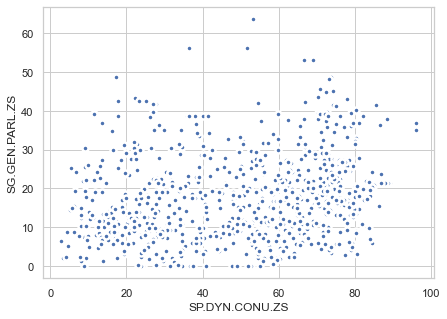

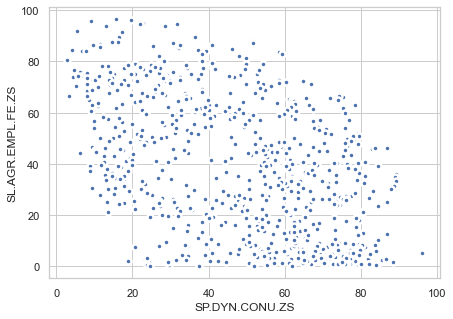

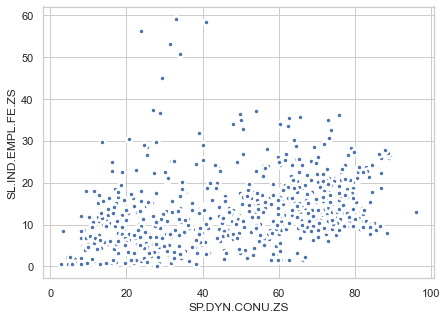

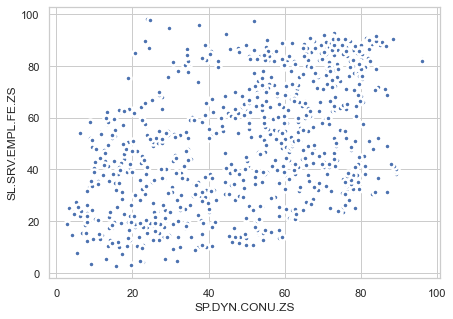

In [20]:
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
ax=sns.scatterplot(x='SP.DYN.CONU.ZS', y='SG.GEN.PARL.ZS', data=totH, linewidth=2.5)

plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
ax=sns.scatterplot(x='SP.DYN.CONU.ZS', y='SL.AGR.EMPL.FE.ZS', data=totH, linewidth=2.5)

plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
ax=sns.scatterplot(x='SP.DYN.CONU.ZS', y='SL.IND.EMPL.FE.ZS', data=totH, linewidth=2.5)

plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
ax=sns.scatterplot(x='SP.DYN.CONU.ZS', y='SL.SRV.EMPL.FE.ZS', data=totH, linewidth=2.5)

# 직군별로 다른 모습

In [21]:
conPIV = pd.pivot_table(totH, index='SP.DYN.CONU.ZS')
conPIV

,SG.GEN.PARL.ZS,SL.AGR.EMPL.FE.ZS,SL.IND.EMPL.FE.ZS,SL.SRV.EMPL.FE.ZS
SP.DYN.CONU.ZS,,,,
2.8,6.451613,80.540001,0.600000,18.860001
3.3,2.048417,66.459999,8.550000,25.000000
4.1,2.400000,84.519997,0.660000,14.820000
4.3,8.750000,74.050003,2.330000,23.629999
4.8,5.161290,76.570000,0.630000,22.799999
...,...,...,...,...
88.6,21.323036,31.420000,27.180000,41.400002
89.0,21.325745,34.689999,25.990000,39.320000
89.1,21.325745,33.369999,26.620001,40.009998


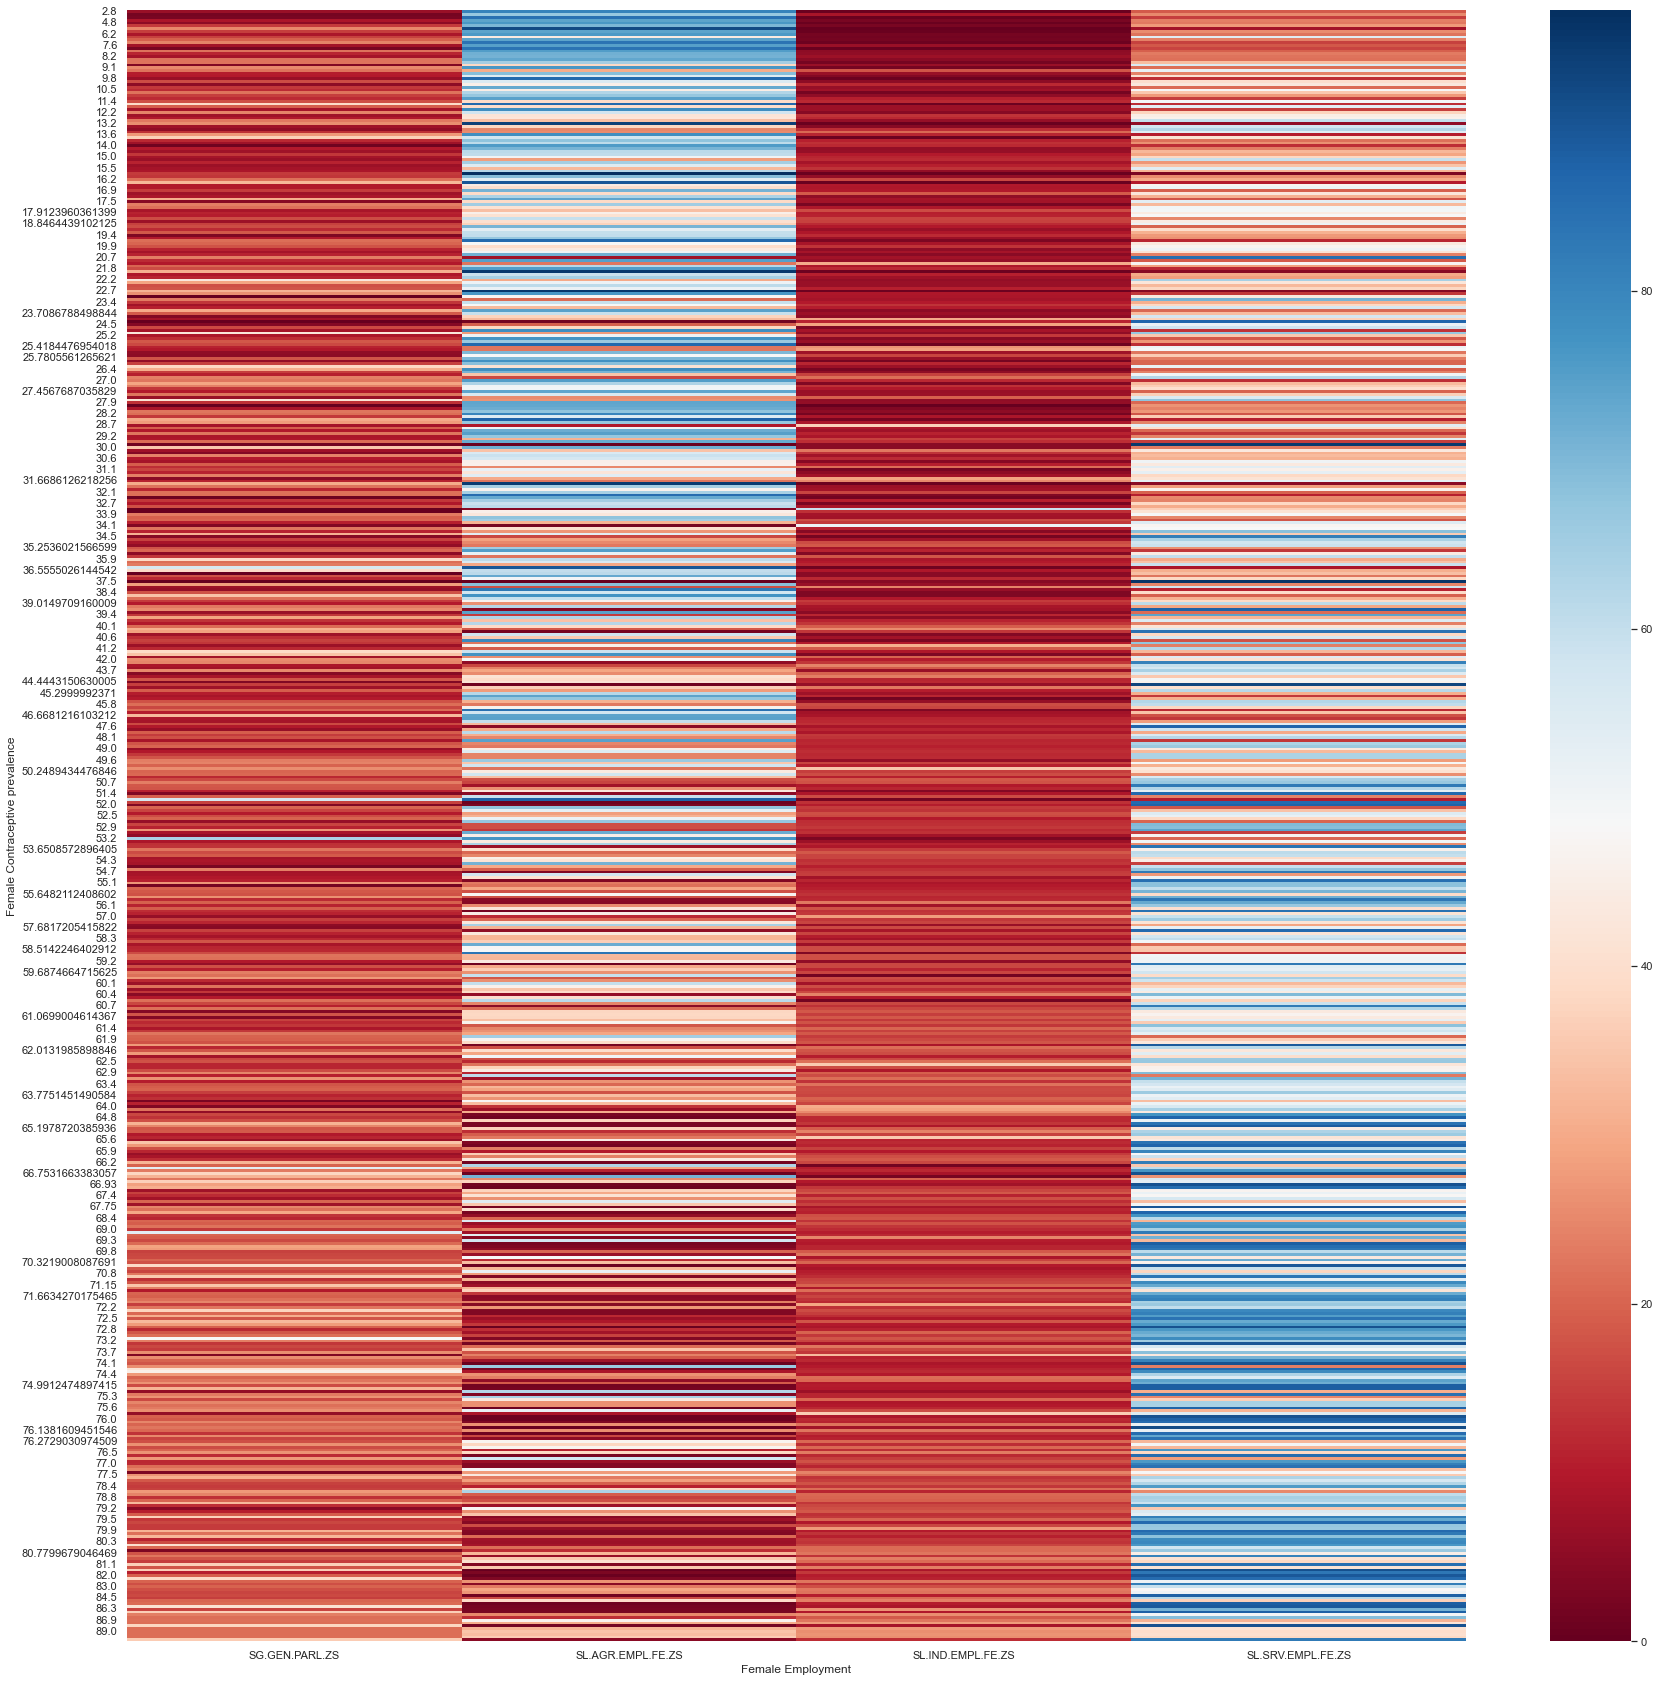

In [24]:
fig, axes = plt.subplots(figsize=(30, 30))
sns.heatmap(conPIV, cmap='RdBu', ax=axes)
plt.xlabel('Female Employment')
plt.ylabel('Female Contraceptive prevalence')
plt.show()